# Praktikum 3

Praktikum 3 kali ini kita akan mencoba menggunakan Keras untuk Regresi, khususnya pada kasus Prediksi Harga Rumah.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - loss: 0.9019
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.8916
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8814
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.8712
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.8611
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.8510
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.8410
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8310
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.8211
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8113
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.8015
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7918
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.7821
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7725
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.7630
Epoch 16/100
1/1 ━━━━━━━━━━━━━

# Tugas 4:

Ubah learning rate.

Bandingkan hasil loss.

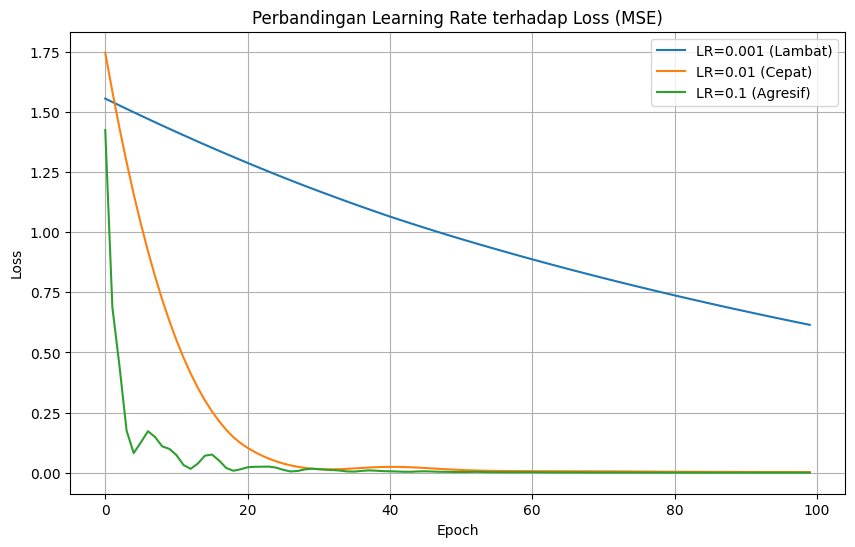

In [ ]:
import matplotlib.pyplot as plt

def build_and_train(learning_rate):
    # Build Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])

    # Compile dengan Learning Rate kustom
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Train
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return history.history['loss']

# Jalankan eksperimen
lr_kecil = build_and_train(0.001)
lr_sedang = build_and_train(0.01)
lr_besar = build_and_train(0.1)

# Plot Perbandingan
plt.figure(figsize=(10, 6))
plt.plot(lr_kecil, label='LR=0.001 (Lambat)')
plt.plot(lr_sedang, label='LR=0.01 (Cepat)')
plt.plot(lr_besar, label='LR=0.1 (Agresif)')
plt.title('Perbandingan Learning Rate terhadap Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Analisis Perbandingan

**1. Garis Biru (LR = 0.001 - "Lambat")**
* **Perilaku:** Garis menurun secara linear namun **sangat lambat**. Hingga epoch ke-100, loss masih berada di kisaran 0.6 (masih jauh dari 0).
* **Analisis:** Langkah yang diambil model terlalu kecil. Model ini *underfitting* pada saat epoch ke-100 karena belum mencapai titik minimum (solusi optimal).
* **Kesimpulan:** Butuh ribuan epoch lagi untuk sampai ke tujuan jika menggunakan LR ini. Tidak efisien waktu.

**2. Garis Oranye (LR = 0.01 - "Cepat/Ideal")**
* **Perilaku:** Garis membentuk kurva yang mulus (*smooth*). Loss turun secara signifikan dan mulai menyentuh angka mendekati 0 (konvergen) di sekitar epoch ke-40 atau 50.
* **Analisis:** Ini adalah **konfigurasi terbaik** untuk kasus ini. Langkahnya cukup besar untuk cepat sampai ke tujuan, tapi cukup kecil untuk masuk ke titik minimum dengan stabil tanpa guncangan.
* **Kesimpulan:** Seimbang antara kecepatan dan stabilitas.

**3. Garis Hijau (LR = 0.1 - "Agresif")**
* **Perilaku:** Loss jatuh tegak lurus (sangat curam) hampir seketika di 5 epoch pertama. Namun, perhatikan adanya sedikit **gerigi/guncangan** (osilasi) di bagian bawah antara epoch 5-20 sebelum akhirnya stabil.
* **Analisis:** Model mengambil langkah raksasa. Meskipun terlihat paling cepat di sini, LR sebesar ini sangat **berisiko**. Pada dataset yang lebih kompleks (seperti Boston Housing yang akan Anda kerjakan berikutnya), LR 0.1 seringkali menyebabkan *Overshooting* (melompati titik terendah) atau bahkan membuat Loss menjadi *NaN* (error meledak).
* **Kesimpulan:** Terlalu agresif. Beruntung bisa konvergen di data dummy ini karena datanya sangat sederhana, tapi berbahaya untuk data real.

---

### Analogi Sederhana: "Turun Gunung"

Bayangkan sedang berada di puncak gunung dan ingin turun ke lembah terendah (titik error 0) dengan mata tertutup:


1.  **LR 0.001 (Biru):** Anda turun dengan **langkah semut** (jinjit). Sangat aman, Anda tidak akan tergelincir, tapi butuh waktu berhari-hari untuk sampai ke bawah.
2.  **LR 0.01 (Oranye):** Anda berjalan dengan **langkah normal**. Anda sampai di bawah dengan cepat dan selamat.
3.  **LR 0.1 (Hijau):** Anda turun dengan cara **melompat jauh**. Anda sampai sangat cepat, tapi ada risiko Anda melompat terlalu jauh melewati lembah dan malah naik ke bukit di seberangnya (*overshooting*).

### Kesimpulan Akhir
Untuk Tugas 4 ini:
* **LR 0.01 (Oranye)** adalah pemenangnya karena paling stabil dan efisien.
* **LR 0.001 (Biru)** terlalu lambat (membuang *computing power*).
* **LR 0.1 (Hijau)** terlalu berisiko.

Praktikum berikut akan menggunakan data Boston untuk memprediksi harga rumah.

In [ ]:
!pip install tensorflow


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2311941877.py:20: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Menggunakan metode manual load data (karena load_boston deprecated)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sedang melatih model Boston Housing...


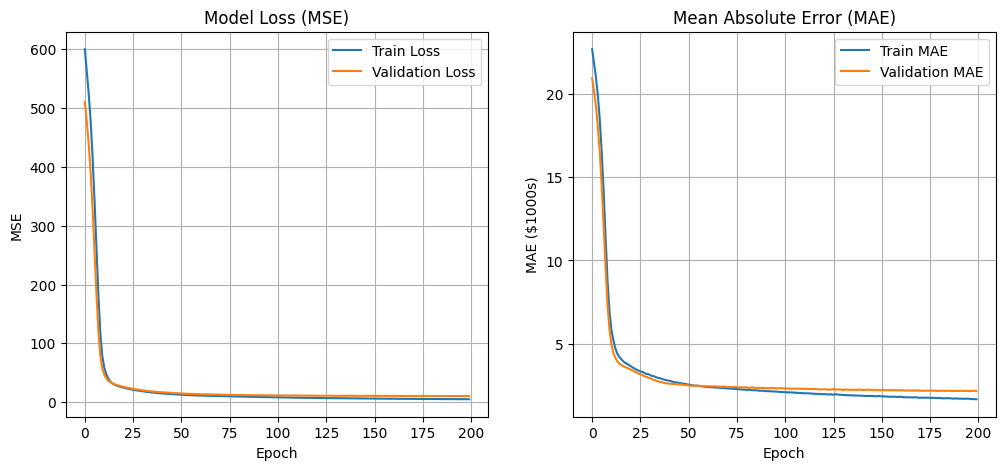

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

RMSE (Root Mean Squared Error): 3.2311
Artinya: Prediksi harga rumah meleset sekitar +/- $3.23000 dari harga asli.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# --- 1. LOAD DATA (Dengan Penanganan Error Sklearn Baru) ---
try:
    from sklearn.datasets import load_boston
    data = load_boston()
    X = data.data
    y = data.target
except ImportError:
    print("Menggunakan metode manual load data (karena load_boston deprecated)...")
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    X = data
    y = target

# --- 2. PREPROCESS ---
# Standarisasi fitur sangat penting untuk Regresi Neural Network
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Split Data
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# --- 3. BUILD MODEL ---
# Input shape disesuaikan otomatis dengan jumlah fitur X
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Output 1 neuron (prediksi harga)
])

# Compile dengan Learning Rate 1e-3 (0.001)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# --- 4. TRAIN ---
print("Sedang melatih model Boston Housing...")
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# --- 5. PLOT HASIL ---
plt.figure(figsize=(12, 5))

# Plot MSE (Loss)
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Plot MAE (Mean Absolute Error) - Rata-rata kesalahan dalam satuan Dollar
plt.subplot(1, 2, 2)
plt.plot(h.history['mae'], label='Train MAE')
plt.plot(h.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE ($1000s)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.show()

# --- 6. EVALUASI AKHIR ---
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print(f'\nRMSE (Root Mean Squared Error): {rmse:.4f}')
print(f"Artinya: Prediksi harga rumah meleset sekitar +/- ${rmse:.2f}000 dari harga asli.")